# Temperature monitoring in M17 ice cave

### Author: Tanguy Racine


#### 1. Situation

M17 is located on the Migovec Plateau, NW Slovenia. It is a 99m deep shaft cave hosting a perennial firn and ice body, therefore it is an ice cave sensu Luetscher and Jeannin (2004).

There are three feeder dolines containing snow cones which provide the snow and firn to build the ice body. A large chamber located halfway down the cave contains an ice rink of regelation ice formed by freezing of melted snow. During the summer months, rivulets of melt water are carved on the ice rink, while clasts of limestone visible under the frozen surface attest the complicated story of freezing-thaw alternations over the years.

The ice rink chamber usually contains seasonal ice fillings during the spring and early summer months (april to August), degrade completely during the autumn. In the autumn of 2018 a tunnel formed by ice sublimation under air movement provided a through way between the main chamber back and one of the hitherto inaccessible dolines, giving the ice cave a second entrance.

The lower part of the cave is a loose ice-filled shaft.



![M17 ice cave survey](../therion/outputs/M17.pdf "M17 ice cave")

#### 2. Survey and new logger placement
As of the 8th of August 2018, 2  bluetooth Hobo data loggers (with internal sensors) were installed in the ice rink chamber of the cave. One, logger 473 is placed at the bottom of the original entrance shaft of the cave (NE of main chamber) while the second is placed under a recess near the SW feeder cone, away from the main air movements within the cave.


First, we import pandas, numpy and matplotlib modules into the notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as date
from math import pi

Second, we save each excel tab as a different csv file and import each csv file under a different name. We use Pandas dataframes to store the data within the jupyter notebook. 

We then take care to index the dataframes with the datetime column to take advantage of the time series analysis capabilities of the pandas dataframe.

In [3]:
logger1 = pd.read_csv("2018_10_19/SN 20440473 2018_10_19.csv",
                      skiprows=[0,1], 
                      index_col = 'Date Time - GMT +01:00', 
                      parse_dates = True, 
                      usecols = [0,1,2,3])
logger2 = pd.read_csv("2018_10_19/SN 20440475 2018_10_19.csv",
                      skiprows=[0,1], 
                      index_col = 'Date Time - GMT +01:00',
                      parse_dates = True, 
                      usecols = [0,1,2,3])

In [4]:
logger2['2018-08-15']

,"Temp, (*C)","RH, (%)","DewPt, (*C)"
Date Time - GMT +01:00,,,
2018-08-15 00:56:58,0.21,99.98,0.20
2018-08-15 01:56:58,0.21,99.98,0.20
2018-08-15 02:56:58,0.17,99.98,0.16
2018-08-15 03:56:58,0.17,99.98,0.16
2018-08-15 04:56:58,0.17,99.98,0.16
2018-08-15 05:56:58,0.21,99.98,0.20
2018-08-15 06:56:58,0.17,99.98,0.16
2018-08-15 07:56:58,0.21,99.98,0.20
2018-08-15 08:56:58,0.17,99.98,0.16


Now, to automate much of the rest of the plotting, it would be useful to pass a function through a dictionary associating the dataframes with their titles.

In [19]:
def tempPlotter(mypd,params):
    fig, ax = plt.subplots(figsize = params['plot_dims'])
    
    dat = mypd[params['Series']][params['start']:params['end']]

    ax.set_title(params['Title'])
    ax.plot(dat, color='black', lw = 0.5, alpha = 0.5)
    ax.fill_between(dat.index, dat, 0, where=dat>=0, color='#ff8080', lw = 0.5, alpha = 0.5)
    ax.fill_between(dat.index, dat, 0, where=dat<=0, color='#004d99', lw = 0.5, alpha = 0.5)
    ax.axhline(0, color='black', lw=0.5)
    ax.legend(loc = 0)

    ax.set(xlabel = 'Time', ylabel = 'Temperature $\degree$ C')
    plt.savefig('fig/'+params['start']+'_'+params['end']+'_'+params['filename'], dpi = 300)

    plt.show()

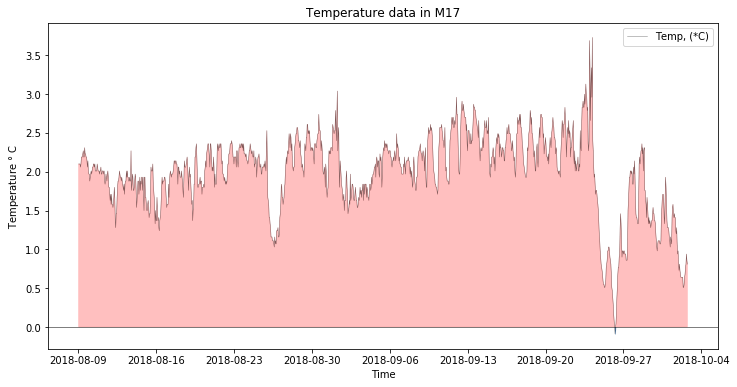

In [31]:
plot1 = {
    'filename':'temp_M17_1',
    'Title' : 'Temperature data in M17' , #a string needed for the title
    'plot_dims' : (12,6), #needs to be a tuple
    'Series' : 'Temp, (*C)', # this needs to be a string
    'start' :'2018-08-09', # again a string for start and end dates
    'end' : '2018-10-02'
}

tempPlotter(logger1,plot1)

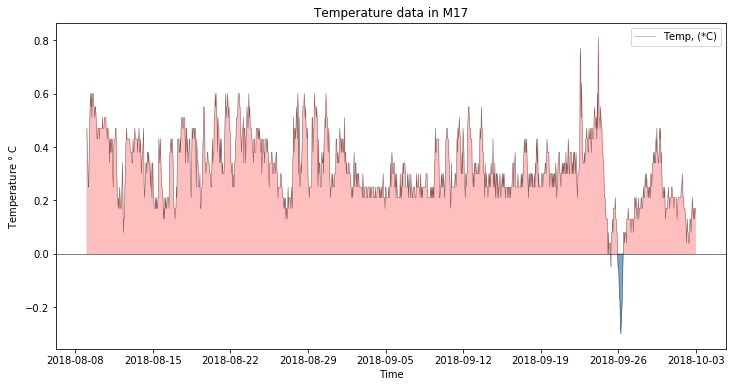

In [32]:
plot2 = {
    'filename':'temp_M17_2',
    'Title' : 'Temperature data in M17' , #a string needed for the title
    'plot_dims' : (12,6), #needs to be a tuple
    'Series' : 'Temp, (*C)', # this needs to be a string
    'start' :'2018-08-09', # again a string for start and end dates
    'end' : '2018-10-02'
}

tempPlotter(logger2,plot2)

In [18]:
print(logger2['2018-08':'2018-09'].std())
print(logger2['2018-08':'2018-09'].mean())

Temp, (*C)     0.271134
RH, (%)        1.286233
DewPt, (*C)    0.139416
dtype: float64
Temp, (*C)      0.330420
RH, (%)        99.845159
DewPt, (*C)     0.303854
dtype: float64


In [17]:
print(logger1['2018-08':'2018-09'].std())
print(logger1['2018-08':'2018-09'].mean())

Temp, (*C)     0.494492
RH, (%)        0.951752
DewPt, (*C)    0.481072
dtype: float64
Temp, (*C)      2.024833
RH, (%)        99.878749
DewPt, (*C)     2.005198
dtype: float64


The mean for August/September picked up by logger 1 (2.0±0.5°C) near the base of the shaft is unsurprisingly higher than in the recess near the 3rd snow feeder cone measured by logger 2 (0.3±0.3°C). The standard deviation around the average is also higher at logger1, indicating that the large temperature variations in are picked up by the base of the shaft, and perhaps augmented by circulation cell linking the two shafts. 

Perhaps surprisingly, the cold excursion around 24th September is picked up by both loggers.

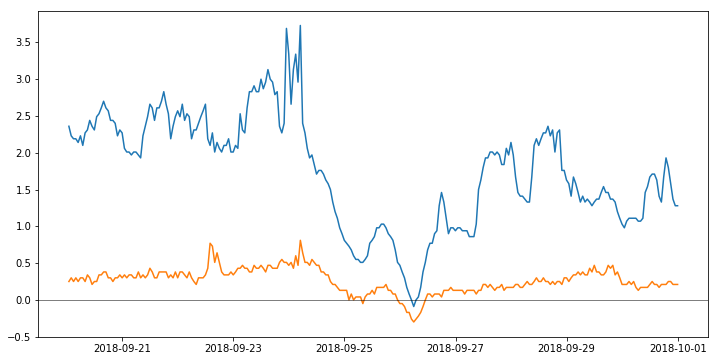

In [22]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(logger1['Temp, (*C)']['2018-09-20':'2018-09-30'])
ax.plot(logger2['Temp, (*C)']['2018-09-20':'2018-09-30'])
ax.axhline(0, color='black', lw=0.5)

plt.show()

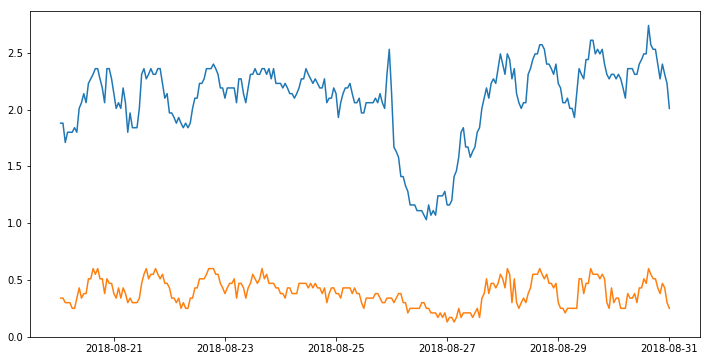

In [23]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(logger1['Temp, (*C)']['2018-08-20':'2018-08-30'])
ax.plot(logger2['Temp, (*C)']['2018-08-20':'2018-08-30'])
ax.axhline(0, color='black', lw=0.5)

plt.show()

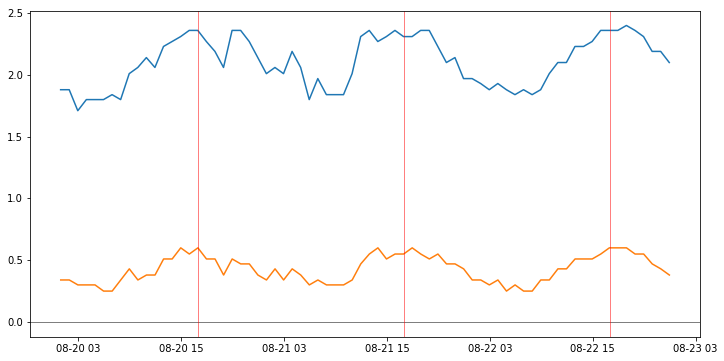

In [117]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(logger1['Temp, (*C)']['2018-08-20':'2018-08-22'])
ax.plot(logger2['Temp, (*C)']['2018-08-20':'2018-08-22'])
ax.axhline(0, color='black', lw=0.5)
ax.axvline('2018-08-20 17:00:00', color='red', lw = 0.5)
ax.axvline('2018-08-21 17:00:00', color='red', lw = 0.5)
ax.axvline('2018-08-22 17:00:00', color='red', lw = 0.5)
plt.show()

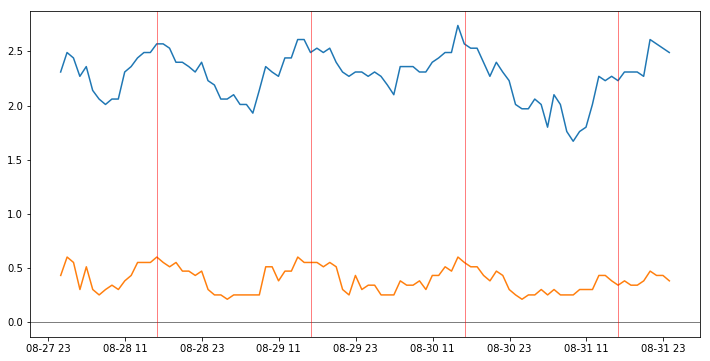

In [120]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(logger1['Temp, (*C)']['2018-08-28':'2018-08-31'])
ax.plot(logger2['Temp, (*C)']['2018-08-28':'2018-08-31'])
ax.axhline(0, color='black', lw=0.5)
ax.axvline('2018-08-28 16:00:00', color='red', lw = 0.5)
ax.axvline('2018-08-29 16:00:00', color='red', lw = 0.5)
ax.axvline('2018-08-30 16:00:00', color='red', lw = 0.5)
ax.axvline('2018-08-31 16:00:00', color='red', lw = 0.5)
plt.show()

Here, we can see both loggers pick-up daily temperature cycles. An interesting finding is that temperature maxima are reached predictably within 3hrs of maximal solar insolation.

Let's work out what the local solar time is at this time of the year.

In [112]:
from math import pi
def diff_solar(day):
    a = 0.000075
    b = 0.001868
    c = 0.032077
    d = 0.014615
    e = 0.0409
    days = 360* (day-1)/365 *pi/180
    dt = (-15 + 13.760417) *4
    E= 180 * 4/pi * (a + b * np.cos(days) - c*np.sin(days) - d * np.cos(2*days) - e * np.sin(2*days)) + dt
    return E

In [113]:
doY = pd.DataFrame(np.linspace(0,365,366))
doY.head()

,0
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


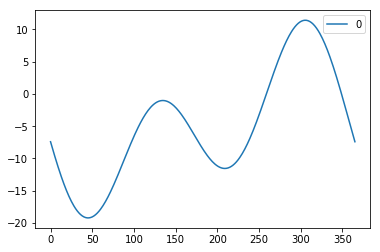

In [114]:
E = diff_solar(doY)
E.plot()

In [115]:
logger1['2018-08-20'].index.dayofyear

Int64Index([232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232,
            232, 232, 232, 232, 232, 232, 232, 232, 232, 232, 232],
           dtype='int64', name='Date Time - GMT +01:00')

In [116]:
E.iloc[232]

0   -8.77613
Name: 232, dtype: float64

Therefore, solar insulation maxima occur approximately nine minutes after standard CET time at the longitude of interest, and that the lag between zenith (12.00 solar time), therefore maximal solar irradiation and maximal temperature in the cave is roughly 5hrs.